<a href="https://colab.research.google.com/github/audrey-siqueira/Desafio_Cognitivo/blob/main/Cognitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Teste Técnico Data Science - Cognitivo A.I**
---
<p align="justify">
O projeto consiste na extração dados do Airbnb Rio de
Janeiro.

<p align=center>
<img src="https://drive.google.com/uc?id=1uPVD-WcNfm8_9s4ze3F_MdSFP73teSzN" width="60%"></p>

<p align="justify">

Uma análise exploratória será feita para avaliar a consistência dos dados e identificar possíveis variáveis que impactam a variável resposta.

<p align="justify">
O modelo proposto:

- O melhor modelo de Classificação para os tipos de quartos **(feature‘room_type’)**

<p align="justify">
O objetivo final é classificar da melhor maneira os tipos de quartos e saber quais características os quartos possuem em comum, facilitando a visualização do potencial de negócios da empresa.



**A descrição do código é explicada abaixo:**

## **Instalação do PyCaret e importação de bibliotecas**


O projeto será baseado na biblioteca PyCaret, devido ao seu fácil manuseio e agilidade para atingir o objetivo de prever os preços dos imóveis.

In [2]:
# instalando o PyCaret
!pip install pycaret -q

     |████████████████████████████████| 81kB 3.5MB/s 
ERROR: pandas-profiling 2.11.0 has requirement requests>=2.24.0, but you'll have requests 2.23.0 which is incompatible.


In [3]:
# configurando PyCaret para o Colab
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


As bibliotecas necessárias para o projeto são importadas.

-Pandas para manipulação e análise de dados

-Numpy para operações matemáticas

-Matplotlib e Seaborn para visualizações gráficas

In [4]:
# importando bibliotecas para o projeto
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

## **Importando o dataset**


O arquivo .csv contendo o dataset da empresa é importado.

Os valores do cabeçalho do dataset e como eles são distribuídos podem ser vistos abaixo:

In [5]:
# importando os dados
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cognitivo/cognitivo.csv')
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,201,5,258,2020-12-26,2.01,1,286
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.84,11,357
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.05,1,300
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,350,2021-01-24,2.79,1,84
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,492,3,18,2016-02-09,0.19,2,365


A composição do número de linhas e colunas do dataset é mostrada abaixo:

In [31]:
# verificando o número de linhas e colunas do dataset
dataset.shape

(26106, 16)

Histograma para um panorama geral das divisões dos tipos de quartos.

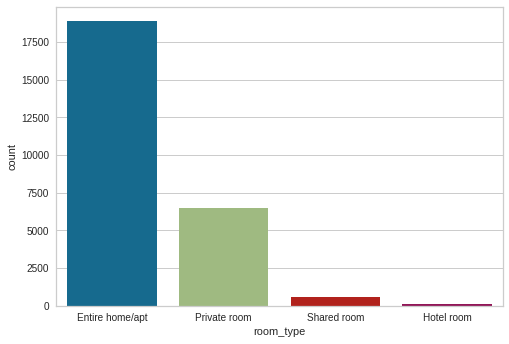

In [182]:
sns.countplot(x="room_type", data=dataset)

## **Dividindo o dataset**

A fim de demonstrar a função predict_model () em **Unseen Data**, uma amostra de 2611 registros foi retirada do dataset original para ser usado para previsões no modelo finalizado.

Isso não deve ser confundido com uma divisão de **treinamento / teste**, já que essa divisão em particular foi projetada para simular um cenário da vida real.

Outra maneira de pensar sobre isso é que esses 2611 registros não estavam disponíveis no momento em que o experimento de aprendizado de máquina foi executado.

In [32]:
# separando os dados entre os usados no modelo e os dados ocultos
data = dataset.sample(frac=0.9)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (23495, 16)
Unseen Data For Predictions: (2611, 16)


## **Classificação no PyCaret**

### Importando os pacotes necessários para usar o PYCARET para Classificação.

In [33]:
# importando os pacotes necessários para Classificação
from pycaret.classification import *

### Configurando o dataset para Classificação no PyCaret

Como o projeto visa classificar os tipos de quarto, a coluna **room_type** será a variável dependente.

As colunas **id, host_id, name e host_name** serão excluídas porque não possuem relevância na classificação para treinar os modelos.

As demais colunas com variáveis independentes foram adicionadas no treinamento, obtendo o dataset final.

O PyCaret é responsável por dividir as variáveis entre numéricas e categóricas, incluindo exclusão de valores faltantes, além de registrar diversos outros parâmetros do dataset, conforme listado abaixo:

In [ ]:
#excluindo as linhas da coluna "last_review" que possuem valores vazios
data.dropna(subset = ["last_review"], inplace=True)

In [ ]:
clf= setup(data = data, target = 'room_type', ignore_features = ['id','host_id','name','host_name'])

### Comparando modelos de Classificação para escolher o melhor

In [12]:
# Comparando todos os modelos de Classificação disponibilizados pelo PyCaret
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8517,0.9044,0.4793,0.8430,0.8434,0.5939,0.5981,0.844
gbc,Gradient Boosting Classifier,0.8466,0.9007,0.4678,0.8357,0.8356,0.5697,0.5781,11.373
rf,Random Forest Classifier,0.8386,0.8900,0.3824,0.8203,0.8200,0.5269,0.5451,1.819
knn,K Neighbors Classifier,0.7923,0.7923,0.3754,0.7738,0.7800,0.4250,0.4294,0.624
ada,Ada Boost Classifier,0.7918,0.7418,0.4507,0.7910,0.7821,0.4231,0.4337,0.820
et,Extra Trees Classifier,0.7842,0.8034,0.3276,0.7517,0.7504,0.3209,0.3536,2.255
lr,Logistic Regression,0.7779,0.7970,0.3005,0.7438,0.7272,0.2509,0.3106,8.365
dt,Decision Tree Classifier,0.7721,0.7208,0.4623,0.7737,0.7727,0.4200,0.4201,0.155
ridge,Ridge Classifier,0.7590,0.0000,0.2838,0.7117,0.7001,0.1703,0.2225,0.055
lda,Linear Discriminant Analysis,0.7476,0.6982,0.3220,0.7111,0.7003,0.1833,0.2165,0.345


### Criando o modelo de Classificação

O algoritmo de classificação que obteve o melhor desempenho baseado no AUC e Acuracidade foi o **Light Gradient Boosting Machine**.

A função abaixo treina e avalia o desempenho do determinado modelo escolhido.

É possível visualizar o comportamento do modelo para diferentes Folds.

In [13]:
# treinando o melhor modelo determinado pelo ranking acima baseado em AUC e Acuracidade
modelo = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8626,0.9127,0.4757,0.8543,0.8542,0.6243,0.6286
1,0.8433,0.9017,0.4602,0.8303,0.8337,0.5636,0.5704
2,0.8558,0.9071,0.4960,0.8482,0.8494,0.6115,0.6136
3,0.8635,0.9115,0.5455,0.8556,0.8562,0.6257,0.6303
4,0.8442,0.8948,0.4046,0.8297,0.8329,0.5709,0.5752
5,0.8577,0.9077,0.4579,0.8484,0.8495,0.6113,0.6149
6,0.8519,0.9108,0.4884,0.8496,0.8438,0.5953,0.5989
7,0.8558,0.9068,0.4835,0.8484,0.8473,0.6036,0.6082
8,0.8577,0.9084,0.4741,0.8500,0.8492,0.6063,0.6120
9,0.8250,0.8819,0.5068,0.8157,0.8182,0.5269,0.5292


### Tunando o modelo de Classificação com o ajuste de hiperparâmetros

In [14]:
# tuning de parâmetros
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8598,0.9167,0.4014,0.8370,0.8468,0.6109,0.6169
1,0.8433,0.9049,0.4442,0.8341,0.8321,0.5572,0.5661
2,0.8529,0.9066,0.4155,0.8476,0.8434,0.6018,0.6041
3,0.8519,0.9061,0.3921,0.8287,0.8382,0.5851,0.5924
4,0.8490,0.9011,0.4097,0.8353,0.8385,0.5875,0.5908
5,0.8615,0.9000,0.4924,0.8588,0.8525,0.6164,0.6223
6,0.8519,0.9036,0.4086,0.8446,0.8398,0.5885,0.5943
7,0.8567,0.9092,0.4250,0.8479,0.8448,0.5983,0.6060
8,0.8635,0.9119,0.4468,0.8552,0.8532,0.6205,0.6268
9,0.8221,0.8861,0.3744,0.7999,0.8096,0.5083,0.5127


Os valores dos parâmetros do algoritmo escolhido após a otimização do modelo podem visualizados abaixo:

In [34]:
# veriificando os parâmetros
print(tuned_modelo)


LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.5, n_estimators=200, n_jobs=-1, num_leaves=60,
               objective=None, random_state=3855, reg_alpha=0.2, reg_lambda=10,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


### Plotando o modelo de Classificação

Representação gráfica do modelo para diferentes tipos de métricas:

Abaixo está a matriz de confusão do modelo de classificação construído:

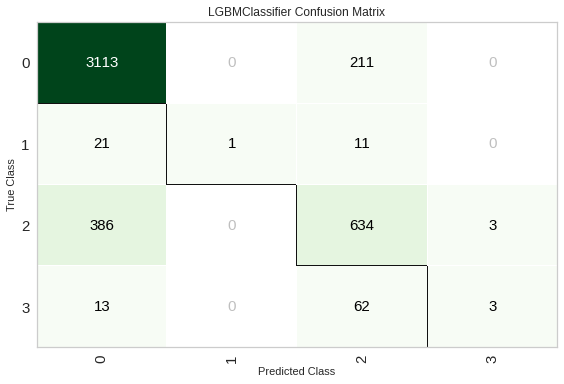

In [183]:
plot_model(tuned_modelo, plot='confusion_matrix')

O relatório de classificação também é plotado para entender a precisão, recall, f1 e suporte do modelo.

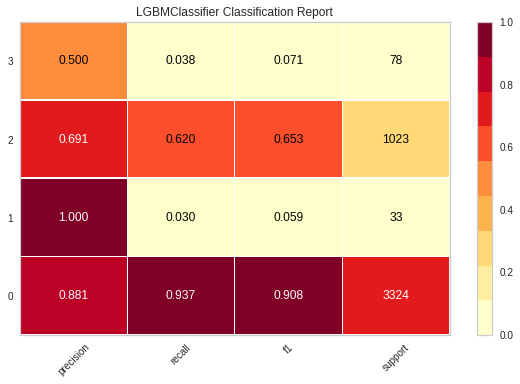

In [184]:
plot_model(tuned_modelo, plot='class_report')

Para se ter uma visão completa do modelo, o gráfico de curva ROC é traçado, de forma que seja possível verificar os valores de ROC.

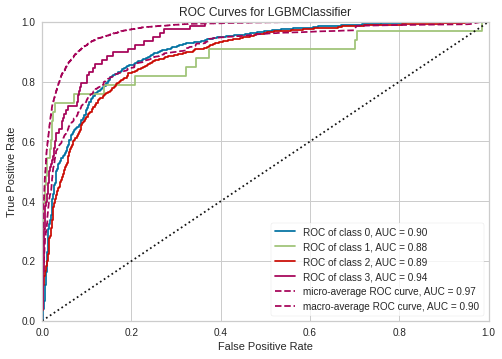

In [185]:
plot_model(tuned_modelo, plot='auc')

Os graus de importância das variáveis independentes que mais impactam o modelo de classificação final são classificados abaixo:

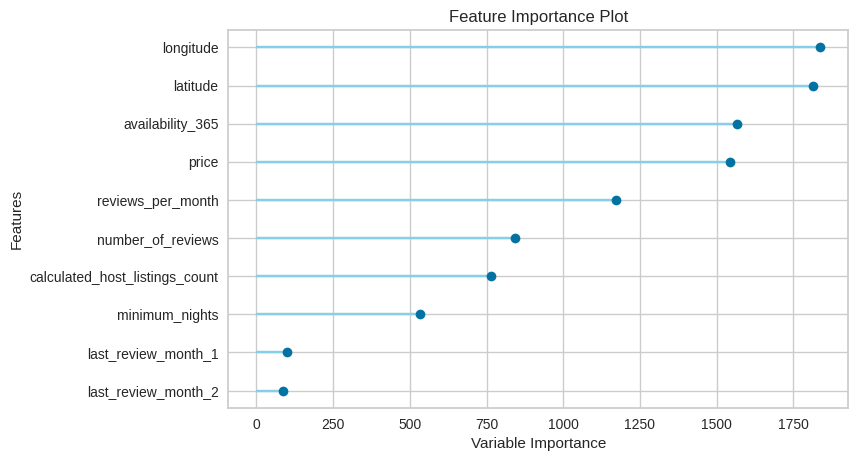

In [186]:
plot_model(tuned_modelo, plot='feature')

### Prevendo os resultados do conjunto de testes com o modelo tunado

In [39]:
 # fazendo previsões para o Testset com o modelo de Classificação tunado
predict_model(tuned_modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8414,0.9005,0.4063,0.8316,0.8286,0.5617,0.5661


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Alto da Boa Vista,neighbourhood_Andaraí,neighbourhood_Anil,neighbourhood_Bangu,neighbourhood_Barra da Tijuca,neighbourhood_Barra de Guaratiba,neighbourhood_Benfica,neighbourhood_Bento Ribeiro,neighbourhood_Bonsucesso,neighbourhood_Botafogo,neighbourhood_Brás de Pina,neighbourhood_Cachambi,neighbourhood_Camorim,neighbourhood_Campinho,neighbourhood_Campo Grande,neighbourhood_Catete,neighbourhood_Catumbi,neighbourhood_Centro,neighbourhood_Cidade Nova,neighbourhood_Cidade de Deus,neighbourhood_Coelho Neto,neighbourhood_Copacabana,neighbourhood_Cosme Velho,neighbourhood_Cosmos,neighbourhood_Curicica,neighbourhood_Del Castilho,neighbourhood_Encantado,neighbourhood_Engenho Novo,neighbourhood_Engenho da Rainha,neighbourhood_Engenho de Dentro,neighbourhood_Estácio,neighbourhood_Flamengo,...,neighbourhood_Tanque,neighbourhood_Taquara,neighbourhood_Tauá,neighbourhood_Tijuca,neighbourhood_Todos os Santos,neighbourhood_Tomás Coelho,neighbourhood_Urca,neighbourhood_Vargem Grande,neighbourhood_Vargem Pequena,neighbourhood_Vasco da Gama,neighbourhood_Vicente de Carvalho,neighbourhood_Vidigal,neighbourhood_Vila Isabel,neighbourhood_Vila Militar,neighbourhood_Vila Valqueire,neighbourhood_Vila da Penha,last_review_month_1,last_review_month_10,last_review_month_11,last_review_month_12,last_review_month_2,last_review_month_3,last_review_month_4,last_review_month_5,last_review_month_6,last_review_month_7,last_review_month_8,last_review_month_9,last_review_weekday_0,last_review_weekday_1,last_review_weekday_2,last_review_weekday_3,last_review_weekday_4,last_review_weekday_5,last_review_weekday_6,last_review_is_month_end_1,last_review_is_month_start_1,room_type,Label,Score
0,-22.923189,-43.190708,2000.0,1.0,1.0,0.04,3.0,365.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entire home/apt,Private room,0.5687
1,-22.929150,-43.176552,150.0,4.0,1.0,1.00,5.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Private room,Entire home/apt,0.8762
2,-22.952360,-43.166790,150.0,1.0,36.0,0.61,1.0,272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Private room,Entire home/apt,0.7294
3,-23.030540,-43.476028,370.0,2.0,5.0,0.30,19.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Entire home/apt,Entire home/apt,0.9742
4,-22.955641,-43.176609,591.0,4.0,4.0,0.08,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entire home/apt,Entire home/apt,0.9555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453

### Finalizando o Modelo

Finalizar o modelo no PyCaret, significa incluir o próprio dataset teste junto com o dataset de treinamento para fazer o treinamento total do modelo.

Neste caso o **Unseen Data** que separamos no início vai fazer a função de teste, desta forma nosso modelo é aprimorado.

In [21]:
# finalizando o modelo
final_modelo = finalize_model(tuned_modelo)
print(final_modelo)

LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.5, n_estimators=200, n_jobs=-1, num_leaves=60,
               objective=None, random_state=3855, reg_alpha=0.2, reg_lambda=10,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


Nesta etapa as previsões são feitas novamente com o dataset de Teste, o que não seria aconselhável, pois o dataset de Teste participou do treinamento acima para finalizar o modelo.

Mas apenas como forma de comparação e para provar que a precisão do modelo melhora, o cálculo abaixo é repetido, logo é possível ver como a precisão do modelo aumenta em comparação com o tópico anterior.

In [22]:
# fazendo previsões para o Testset com o modelo de Classificação finalizado 
predict_model(final_modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8777,0.9403,0.5176,0.8733,0.8694,0.6644,0.6689


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Alto da Boa Vista,neighbourhood_Andaraí,neighbourhood_Anil,neighbourhood_Bangu,neighbourhood_Barra da Tijuca,neighbourhood_Barra de Guaratiba,neighbourhood_Benfica,neighbourhood_Bento Ribeiro,neighbourhood_Bonsucesso,neighbourhood_Botafogo,neighbourhood_Brás de Pina,neighbourhood_Cachambi,neighbourhood_Camorim,neighbourhood_Campinho,neighbourhood_Campo Grande,neighbourhood_Catete,neighbourhood_Catumbi,neighbourhood_Centro,neighbourhood_Cidade Nova,neighbourhood_Cidade de Deus,neighbourhood_Coelho Neto,neighbourhood_Copacabana,neighbourhood_Cosme Velho,neighbourhood_Cosmos,neighbourhood_Curicica,neighbourhood_Del Castilho,neighbourhood_Encantado,neighbourhood_Engenho Novo,neighbourhood_Engenho da Rainha,neighbourhood_Engenho de Dentro,neighbourhood_Estácio,neighbourhood_Flamengo,...,neighbourhood_Tanque,neighbourhood_Taquara,neighbourhood_Tauá,neighbourhood_Tijuca,neighbourhood_Todos os Santos,neighbourhood_Tomás Coelho,neighbourhood_Urca,neighbourhood_Vargem Grande,neighbourhood_Vargem Pequena,neighbourhood_Vasco da Gama,neighbourhood_Vicente de Carvalho,neighbourhood_Vidigal,neighbourhood_Vila Isabel,neighbourhood_Vila Militar,neighbourhood_Vila Valqueire,neighbourhood_Vila da Penha,last_review_month_1,last_review_month_10,last_review_month_11,last_review_month_12,last_review_month_2,last_review_month_3,last_review_month_4,last_review_month_5,last_review_month_6,last_review_month_7,last_review_month_8,last_review_month_9,last_review_weekday_0,last_review_weekday_1,last_review_weekday_2,last_review_weekday_3,last_review_weekday_4,last_review_weekday_5,last_review_weekday_6,last_review_is_month_end_1,last_review_is_month_start_1,room_type,Label,Score
0,-22.923189,-43.190708,2000.0,1.0,1.0,0.04,3.0,365.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entire home/apt,Private room,0.5922
1,-22.929150,-43.176552,150.0,4.0,1.0,1.00,5.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Private room,Entire home/apt,0.7837
2,-22.952360,-43.166790,150.0,1.0,36.0,0.61,1.0,272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Private room,Entire home/apt,0.5457
3,-23.030540,-43.476028,370.0,2.0,5.0,0.30,19.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Entire home/apt,Entire home/apt,0.9796
4,-22.955641,-43.176609,591.0,4.0,4.0,0.08,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Entire home/apt,Entire home/apt,0.9748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453

### Prevendo os resultados dos  dados **Unseen Data** com o modelo finalizado

**Unseen Data** é finalmente usado para fazer previsões com o modelo finalizado.

In [40]:
data_unseen.dropna(subset = ["last_review"], inplace=True)
unseen_predictions = predict_model(final_modelo, data=data_unseen)
unseen_predictions.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Label,Score
0,51703,"Ocean view, block of the beach, Copacabana,Ipa...",238091,Dália,NaN,Copacabana,-22.98128,-43.19091,Entire home/apt,155,3,163,2021-01-02,1.58,2,353,Entire home/apt,0.9175
1,87762,Flat Top em Ipanema à 150 metros da praia,480527,Caio,NaN,Ipanema,-22.98386,-43.21383,Entire home/apt,100,2,15,2020-02-14,0.37,1,0,Private room,0.6693
2,88528,COZY APARTAMENT ON THE COPACABANA BEACH BLOCK.,474221,June,NaN,Copacabana,-22.97794,-43.18969,Entire home/apt,202,2,65,2020-11-22,0.58,7,346,Entire home/apt,0.9197
3,125115,DISCOVERING RIO - Maracanã & Samba,622730,Claudio,NaN,São Cristóvão,-22.90284,-43.22247,Private room,806,1,2,2013-02-12,0.02,1,365,Entire home/apt,0.5027
5,174101,Penthouse & Private Airy and Quiet Terrace,259815,Valerie & Alex,NaN,Copacabana,-22.98015,-43.19098,Entire home/apt,596,3,190,2020-12-16,1.65,2,88,Entire home/apt,0.9773


Abaixo é possível obter a precisão final do modelo:

In [41]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.room_type, unseen_predictions.Label, 'Accuracy')

0.8825

### Salvando o Modelo de Regressão

In [42]:
# salvando o modelo
save_model(final_modelo, "Modelo (Classificação_Airbnb)" )

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['id', 'host_id', 'name',
                                                        'host_name'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='room_type',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fil...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', l

### Carregando um Modelo

Um exemplo de como fazer previsões com um modelo carregado, é observar que o R quadrado é o mesmo de quando a construção final do modelo foi concluída

In [43]:
#carregando o modelo
saved_final_modelo = load_model('Modelo (Classificação_Airbnb)')

Transformation Pipeline and Model Successfully Loaded


In [44]:
# fazendo previsões
new_prediction = predict_model(saved_final_modelo, data=data_unseen)
new_prediction.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Label,Score
0,51703,"Ocean view, block of the beach, Copacabana,Ipa...",238091,Dália,NaN,Copacabana,-22.98128,-43.19091,Entire home/apt,155,3,163,2021-01-02,1.58,2,353,Entire home/apt,0.9175
1,87762,Flat Top em Ipanema à 150 metros da praia,480527,Caio,NaN,Ipanema,-22.98386,-43.21383,Entire home/apt,100,2,15,2020-02-14,0.37,1,0,Private room,0.6693
2,88528,COZY APARTAMENT ON THE COPACABANA BEACH BLOCK.,474221,June,NaN,Copacabana,-22.97794,-43.18969,Entire home/apt,202,2,65,2020-11-22,0.58,7,346,Entire home/apt,0.9197
3,125115,DISCOVERING RIO - Maracanã & Samba,622730,Claudio,NaN,São Cristóvão,-22.90284,-43.22247,Private room,806,1,2,2013-02-12,0.02,1,365,Entire home/apt,0.5027
5,174101,Penthouse & Private Airy and Quiet Terrace,259815,Valerie & Alex,NaN,Copacabana,-22.98015,-43.19098,Entire home/apt,596,3,190,2020-12-16,1.65,2,88,Entire home/apt,0.9773


In [45]:
# avaliando o modelo
from pycaret.utils import check_metric
check_metric(new_prediction.room_type, new_prediction.Label, 'Accuracy')

0.8825

## **Conclusão**

De acordo com a interpretação dos gráficos, é possível inferir que:

As variáveis relevantes que mais impactam a classificação dos tipos de quartos são localização, disponibilidade e preço respectivamente.

Com os comentários acima, a empresa pode direcionar melhor seu público-alvo para os diferentes tipos de quartos.

O modelo de classificação obteve uma acuracidade de 88,2%, representando um modelo de alta eficácia.

